In [1]:
import matplotlib
matplotlib.use('Agg')

In [50]:
from pathlib import Path

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import preproc_ecg as pecg
import numpy as np

ptb_tdir = Path('/scratch/arka/Ark_git_files/ecg_data/')
ptb_ptdir = ptb_tdir / 'patient_data/'

records = pd.read_csv(ptb_tdir / 'records.txt', header=None)
controls = pd.read_csv(ptb_tdir / 'control.txt', header=None)

In [3]:
reco = records[0]
co = controls[0]

In [4]:
r = reco[0]
c = co[0]

In [8]:
def get_sig_part(r):
    r1 = wfdb.rdrecord(ptb_ptdir + r)
    sig = r1.p_signal
    sig_ds = sig[np.arange(0, sig.shape[0], 4), :]
    sig_bp = pecg.bp_filt(sig_ds)
    _, peak_locs = pecg.pan_tompkins_r_detection(sig_bp[:, 6], fs=200)
    sig_partitioned_p1 = pecg.partition_signal(sig_bp, peak_locs[1:-1])
    return sig_bp, peak_locs, sig_partitioned_p1

In [9]:
sgp1 = get_sig_part(r)

100%|██████████| 50/50 [00:00<00:00, 188423.36it/s]


In [13]:
sgp2 = get_sig_part(reco[1])

100%|██████████| 164/164 [00:00<00:00, 406540.10it/s]


In [17]:
sgp3 = get_sig_part(reco[2])

100%|██████████| 151/151 [00:00<00:00, 509525.26it/s]


In [19]:
sgp4 = get_sig_part(reco[3])

100%|██████████| 149/149 [00:00<00:00, 419994.15it/s]


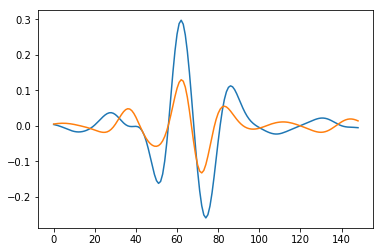

In [21]:
plt.plot(sgp1[-1][0, :, 0])
# plt.plot(sgp2[-1][0, :, 0])
# plt.plot(sgp3[-1][0, :, 0])
plt.plot(sgp4[-1][0, :, 0])

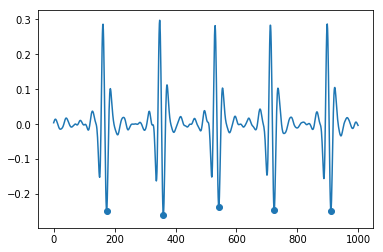

In [11]:
plt.plot(sgp1[0][:1000, 0])
p1locs = np.array(sgp1[1])[np.where(np.array(sgp1[1])<1000)]
plt.scatter(p1locs, sgp1[0][:1000, 0][p1locs])

In [ ]:
r2  = wfdb.rdrecord(ptb_ptdir + r)

In [ ]:
plt.plot(r2.p_signal[:, 1])

In [25]:
r1 = wfdb.rdrecord(ptb_ptdir + r)
c1 = wfdb.rdrecord(ptb_ptdir + c)

In [ ]:
c1.p_signal[:,0].max()

In [ ]:
sig = r1.p_signal
sig_ds = sig[np.arange(0, sig.shape[0], 4), :]
sig_bp = pecg.bp_filt(sig_ds)
_, peak_locs = pecg.pan_tompkins_r_detection(sig_bp[:, 6], fs=200)
sig_partitioned_p1 = pecg.partition_signal(sig_bp, peak_locs[1:-1])

In [ ]:
plt.plot(sig_bp[:, 0])

In [ ]:
plt.plot(sig_bp[:1000, 0])
p1locs = np.array(peak_locs)[np.where(np.array(peak_locs)<1000)]
plt.scatter(p1locs, sig_bp[:1000, 0][p1locs])

In [ ]:
sig = c1.p_signal
sig_ds = sig[np.arange(0, sig.shape[0], 4), :]
sig_bp = pecg.bp_filt(sig_ds)
_, peak_locs = pecg.pan_tompkins_r_detection(sig_bp[:, 6], fs=200)
sig_partitioned_c1 = pecg.partition_signal(sig_bp, peak_locs[1:-1])

In [ ]:
sig_partitioned_p1.shape

In [ ]:
plt.close()

In [ ]:
plt.plot(sig_partitioned_p1[0, :, 0])
plt.plot(sig_partitioned_c1[0, :, 0])

In [ ]:
for i in range(sig_partitioned_p1.shape[0]):
    plt.plot(sig_partitioned_p1[i, :, 0])
# for i in range(sig_partitioned_c1.shape[0]):
#     plt.plot(sig_partitioned_c1[i, :, 0])

In [ ]:
r1.comments[5].split(':')[-2].strip()

In [22]:
records_df = pd.DataFrame(records)

In [28]:
records_df.insert(1, 'Disease', [wfdb.rdrecord(ptb_ptdir + r).comments[4].split(':')[-1].strip() for r in reco])
records_df.insert(2, 'Localization', [wfdb.rdrecord(ptb_ptdir + r).comments[5].split(':')[-1].strip() for r in reco])

In [29]:
records_df

,0,Disease,Localization
0,patient001/s0010_re,Myocardial infarction,infero-latera
1,patient001/s0014lre,Myocardial infarction,infero-latera
2,patient001/s0016lre,Myocardial infarction,infero-latera
3,patient002/s0015lre,Myocardial infarction,anterior
4,patient003/s0017lre,Myocardial infarction,infero-postero-lateral
5,patient004/s0020are,Myocardial infarction,antero-septal
6,patient004/s0020bre,Myocardial infarction,antero-septal
7,patient005/s0021are,Myocardial infarction,anterior
8,patient005/s0021bre,Myocardial infarction,anterior
9,patient005/s0025lre,Myocardial infarction,anterior


In [ ]:
records_df.iloc[519]

In [30]:
records_new_df = records_df[records_df['Disease'] != 'n/a']

In [ ]:
records_new_df

In [31]:
records_new_df['Loc_Disease'] = records_new_df[['Disease', 'Localization']].apply(lambda x: '|'.join(x), axis=1)

/scratch/arka/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
records_new_df['Loc_Disease'].apply(lambda x: x)

0               Myocardial infarction|infero-latera
1               Myocardial infarction|infero-latera
2               Myocardial infarction|infero-latera
3                    Myocardial infarction|anterior
4      Myocardial infarction|infero-postero-lateral
5               Myocardial infarction|antero-septal
6               Myocardial infarction|antero-septal
7                    Myocardial infarction|anterior
8                    Myocardial infarction|anterior
9                    Myocardial infarction|anterior
10                   Myocardial infarction|anterior
11                   Myocardial infarction|anterior
12                   Myocardial infarction|anterior
13                   Myocardial infarction|anterior
14                   Myocardial infarction|anterior
15                   Myocardial infarction|anterior
16                   Myocardial infarction|anterior
17                   Myocardial infarction|anterior
18                   Myocardial infarction|anterior
19          

In [37]:
records_new_df['Loc_Disease_label'] = records_new_df['Loc_Disease'].apply(lambda x: loc_disease_dict[x])

/scratch/arka/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
records_new_df

In [34]:
l1 = records_new_df['Loc_Disease'].unique()

In [35]:
loc_disease_dict = {}
for ind, l in enumerate(l1):
    loc_disease_dict[l] = ind

In [36]:
loc_disease_dict

{'Myocardial infarction|infero-latera': 0,
 'Myocardial infarction|anterior': 1,
 'Myocardial infarction|infero-postero-lateral': 2,
 'Myocardial infarction|antero-septal': 3,
 'Myocardial infarction|inferior': 4,
 'Myocardial infarction|infero-lateral': 5,
 'Myocardial infarction|infero-poster-lateral': 6,
 'Myocardial infarction|antero-lateral': 7,
 'Myocardial infarction|lateral': 8,
 'Myocardial infarction|postero-lateral': 9,
 'Myocardial infarction|posterior': 10,
 'Myocardial infarction|no': 11,
 'Healthy control|no': 12,
 'Valvular heart disease|no': 13,
 'Myocardial infarction|infero-posterior': 14,
 'Dysrhythmia|no': 15,
 'Heart failure (NYHA 2)|no': 16,
 'Heart failure (NYHA 3)|no': 17,
 'Heart failure (NYHA 4)|no': 18,
 'Palpitation|no': 19,
 'Cardiomyopathy|no': 20,
 'Stable angina|no': 21,
 'Myocardial infarction|antero-septo-lateral': 22,
 'Hypertrophy|no': 23,
 'Bundle branch block|no': 24,
 'Unstable angina|no': 25,
 'Bundle branch block|unknown': 26,
 'Myocarditis|no'

In [ ]:
records_new_df

In [38]:
train, validate, test = np.split(records_new_df.sample(frac=1), [int(.6*len(records_new_df)), int(.8*len(records_new_df))])

In [39]:
train.groupby(['Disease']).count()

,0,Localization,Loc_Disease,Loc_Disease_label
Disease,,,,
Bundle branch block,9,9,9,9
Cardiomyopathy,11,11,11,11
Dysrhythmia,11,11,11,11
Healthy control,53,53,53,53
Heart failure (NYHA 3),1,1,1,1
Heart failure (NYHA 4),1,1,1,1
Hypertrophy,3,3,3,3
Myocardial infarction,215,215,215,215
Myocarditis,3,3,3,3


In [40]:
validate.groupby(['Disease']).count()

,0,Localization,Loc_Disease,Loc_Disease_label
Disease,,,,
Bundle branch block,5,5,5,5
Cardiomyopathy,6,6,6,6
Dysrhythmia,3,3,3,3
Healthy control,14,14,14,14
Hypertrophy,4,4,4,4
Myocardial infarction,70,70,70,70
Palpitation,1,1,1,1
Valvular heart disease,1,1,1,1


In [41]:
test.groupby(['Disease']).count()

,0,Localization,Loc_Disease,Loc_Disease_label
Disease,,,,
Bundle branch block,3,3,3,3
Dysrhythmia,2,2,2,2
Healthy control,13,13,13,13
Heart failure (NYHA 2),1,1,1,1
Myocardial infarction,83,83,83,83
Myocarditis,1,1,1,1
Unstable angina,1,1,1,1
Valvular heart disease,1,1,1,1


In [ ]:
ls

In [ ]:
train.insert()

In [42]:
train.to_csv('train.csv')
validate.to_csv('val.csv')
test.to_csv('test.csv')

In [ ]:
?json.dump

In [43]:
import json
json.dump(loc_disease_dict,open('locdisease_map.json', 'w'))

In [44]:
inv_locdise_map = {v: k for k, v in loc_disease_dict.items()}

In [45]:
json.dump(inv_locdise_map, open('inv_locdisease_map.json', 'w'))

In [46]:
def get_beats(sig):
    sig_ds = sig[np.arange(0, sig.shape[0], 4), :]
    sig_bp = pecg.bp_filt(sig_ds)
    _, peak_locs = pecg.pan_tompkins_r_detection(sig_bp[:, 6], fs=200)
    sig_partitioned_c1 = pecg.partition_signal(sig_bp, peak_locs[1:-1])
    return sig_partitioned_c1

In [47]:
from tqdm import tqdm

In [55]:
for r in tqdm(reco):
    p_record = wfdb.rdrecord(ptb_ptdir / r)
    beats = get_beats(p_record.p_signal)
    fname = '_'.join(r.split('/'))
    np.save(str(ptb_tdir) + '/beats_data/' + fname + '_beats.npy', beats)

100%|██████████| 50/50 [00:00<00:00, 71820.27it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/arka/Ark_git_files/ecg_data/beats_data/patient001_s0010_re_beats.npy'